# Biogeochemical functional groups of phytoplankton after the peak

# Set input directory and load libraries

In [1]:
dirname_prefix='../../run_20230324_0000_EXP2_1rbcsno3times1_00sioh4times'
dirname_suffx =''

In [2]:
import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd

# Read

## Read: nutrients

In [3]:
simulations=np.arange(0.25,2.10,0.25)
my_formatter='{0:.2f}'

Vertically integrated nitrate
(0-100 m, $\mathrm{ mmol\ N\ m^{-2} }$)
and vertically integrated silicic acid
(0-100 m, $\mathrm{ mmol\ Si\ m^{-2} }$).

In [4]:
nutrients_files=[dirname_prefix\
                 +my_formatter.format(sim).replace('.','_')\
                 +dirname_suffx\
                 +'/nutrients.csv'\
                 for sim in simulations]
nutrients_frames=[pd.read_csv(f,dtype=np.float32)\
                  for f in nutrients_files]
nutrients_df=pd.concat(nutrients_frames,axis='index')
nutrients_df.index=simulations

Nitrate:silicic acid molar ratio (0-100 m, unitless).

In [5]:
def molar_ratio(row):
    return row['nitrate0_100_onMay15_mmolNm2']\
/row['silicicacid0_100_onMay15_mmolSim2']
nutrients_df['nitrate_silicicacid_molar_ratio0_100_onMay15']\
=nutrients_df.apply(lambda row:molar_ratio(row),axis=1)

Observed nitrate (EXP-2.1 \*1.00) at the sea ice camp in Qikiqtarjuaq 2016.

In [6]:
obsnitrate=nutrients_df.loc[1.00,'nitrate0_100_onMay15_mmolNm2']

Observed silicic acid (EXP-2.2 \*1.00) at the sea ice camp in Qikiqtarjuaq 2016.

In [7]:
obssilicic=nutrients_df.loc[1.00,'silicicacid0_100_onMay15_mmolSim2']

Observed nitrate:silicic acid molar ratio (EXP-2.1 \*1.00) at the sea
ice camp in Qikiqtarjuaq 2016.

In [8]:
obsmr=nutrients_df.loc[1.00,'nitrate_silicicacid_molar_ratio0_100_onMay15']

# Read: groups

In [9]:
simulations=np.arange(0.25,2.10,0.25)
my_formatter='{0:.2f}'
files=[dirname_prefix\
       +my_formatter.format(sim).replace('.','_')\
       +dirname_suffx\
       +'/groups_after_peak.csv'\
       for sim in simulations]
frames=[pd.read_csv(f,dtype=np.float32) for f in files]
groups_after_peak_df=pd.concat(frames)
groups_after_peak_df.index=simulations

In [10]:
groups_after_peak_df=pd.concat([nutrients_df,groups_after_peak_df],
                               axis='columns')

In [11]:
groups_after_peak_df

,nitrate0_100_onMay15_mmolNm2,silicicacid0_100_onMay15_mmolSim2,nitrate_silicicacid_molar_ratio0_100_onMay15,diatoms_biomass_afterpeak_gCm2,dino_biomass_afterpeak_gCm2,other_biomass_afterpeak_gCm2,pico_biomass_afterpeak_gCm2,total_biomass_afterpeak_gCm2,diatoms_perc_afterpeak,dino_perc_afterpeak,other_perc_afterpeak,pico_perc_afterpeak
0.25,563.424744,202.790741,2.778355,83.632469,127.370758,88.379578,46.015526,345.398315,24.213339,36.876484,25.587727,13.322453
0.50,563.362000,405.633850,1.388844,137.669540,75.290512,76.142113,44.923710,334.025879,41.215233,22.540323,22.795275,13.449170
0.75,563.318665,608.636353,0.925542,193.963806,30.181290,65.991600,45.143547,335.280243,57.851250,9.001810,19.682518,13.464422
1.00,563.316467,812.946960,0.692931,195.681686,29.748089,65.562019,45.145016,336.136810,58.214893,8.849995,19.504564,13.430548
1.25,563.316467,1017.300110,0.553737,195.681702,29.748087,65.562012,45.145016,336.136810,58.214897,8.849994,19.504562,13.430548
1.50,563.316467,1221.653198,0.461110,195.681702,29.748087,65.562012,45.145016,336.136810,58.214897,8.849994,19.504562,13.430548
1.75,563.316467,1426.006348,0.395031,195.681702,29.748087,65.562012,45.145016,336.136810,58.214897,8.849994,19.504562,13.430548
2.00,563.316467,1630.359497,0.345517,195.681702,29.748087,65.562012,45.145016,336.136810,58.214897,8.849994,19.504562,13.430548


The distances between the silicic acid concentrations for the plots
where the x-axis is the silicic acid concentrations from left to right:

In [12]:
np.array(groups_after_peak_df \
         ['silicicacid0_100_onMay15_mmolSim2'].iloc[1:])\
-np.array(groups_after_peak_df \
          ['silicicacid0_100_onMay15_mmolSim2'].iloc[:7])

array([202.84311, 203.0025 , 204.31061, 204.35315, 204.35309, 204.35315,
       204.35315], dtype=float32)

The simulations are equally spaced up to 2 significant digits for the silicic acid.

The distances between the nitrate:silicic acid molar ratios for the plots
where the x-axis is the nitrate:silicic acid molar ratios from left
to right:

In [13]:
np.flip( \
        np.array(groups_after_peak_df \
                 ['nitrate_silicicacid_molar_ratio0_100_onMay15'].iloc[:7])\
        -np.array(groups_after_peak_df \
                  ['nitrate_silicicacid_molar_ratio0_100_onMay15'].iloc[1:]) \
       )

array([0.04951411, 0.06607914, 0.09262678, 0.13919467, 0.23261082,
       0.46330142, 1.3895117 ], dtype=float32)

The simulations are **not** equally spaced for the 
nitrate:silicic acid molar ratios.

We decide to keep the plots as is because the different simulations
are considered different categories, so the nitrate:silicic acid
molar ratios can be considered categorical variables instead of
numerical variables.

# Plots

## Plots: biomass

In $\mathrm{ g\ C\ m^{-2} }$.

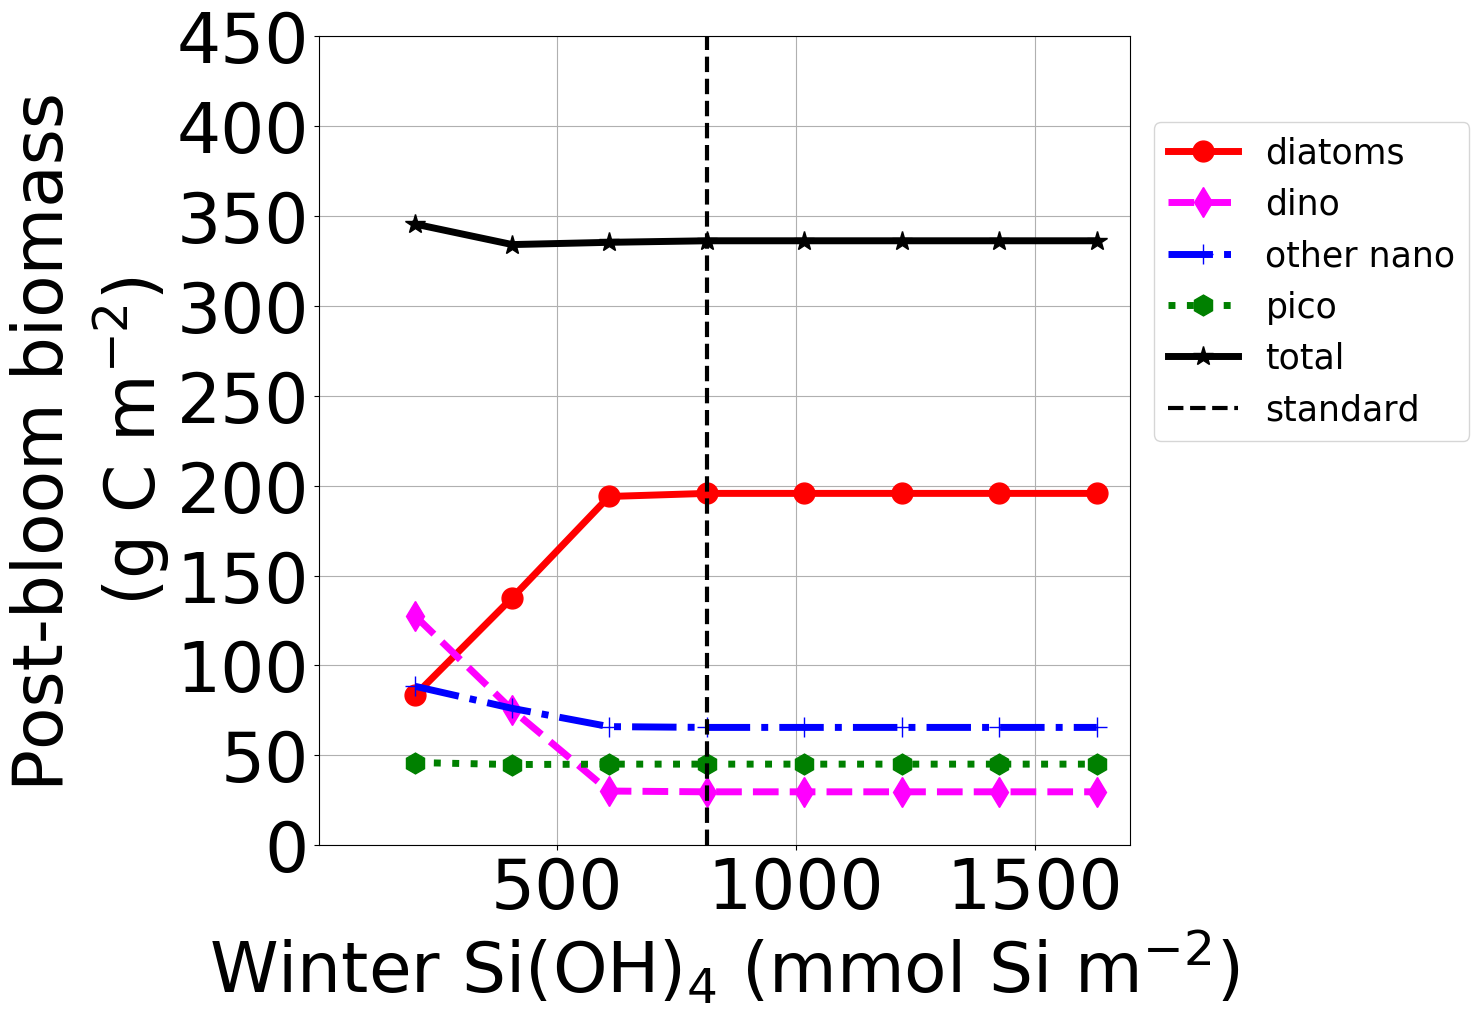

In [14]:
def make_plots(ax):
    plt.plot(groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2'].values,
             groups_after_peak_df['diatoms_biomass_afterpeak_gCm2'].values,
             color='red',marker='o',ls='-',label='diatoms')
    plt.plot(groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2'].values,
             groups_after_peak_df['dino_biomass_afterpeak_gCm2'].values,
             color='magenta',marker='d',ls='--',label='dino')
    plt.plot(groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2'].values,
             groups_after_peak_df['other_biomass_afterpeak_gCm2'].values,
             color='blue',marker='+',ls='-.',label='other nano')
    plt.plot(groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2'].values,
             groups_after_peak_df['pico_biomass_afterpeak_gCm2'].values,
             color='green',marker='h',ls=':',label='pico')
    plt.plot(groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2'].values,
             groups_after_peak_df['total_biomass_afterpeak_gCm2'].values,
             color='black',marker='*',ls='-',label='total')
    ax.set_xlabel('Winter $\mathrm{ Si(OH)_4 }$ ($\mathrm{ mmol\ Si\ m^{-2} }$)')
    ax.set_ylabel('Post-bloom biomass\n($\mathrm{ g\ C\ m^{-2} }$)')
    ax.set_xlim(0,1700)
    ax.set_ylim(0,450)
    ax.set_xticks(np.arange(500,1501,500))
    ax.axvline(obssilicic,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend(loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('biomass_vs_silicic.exp2.2.png')

Figure. Biomass of the different groups between the bloom peak and the end of year for different values of silicic acid vertically integrated (0-100m) on May 15 ($\mathrm{ mmol\ Si\ m^{-2} }$). Dotted vertical line was the observed winter silicic acid at the Green Edge sea ice camp 2016.

## Plots: molar ratio

Unitless.

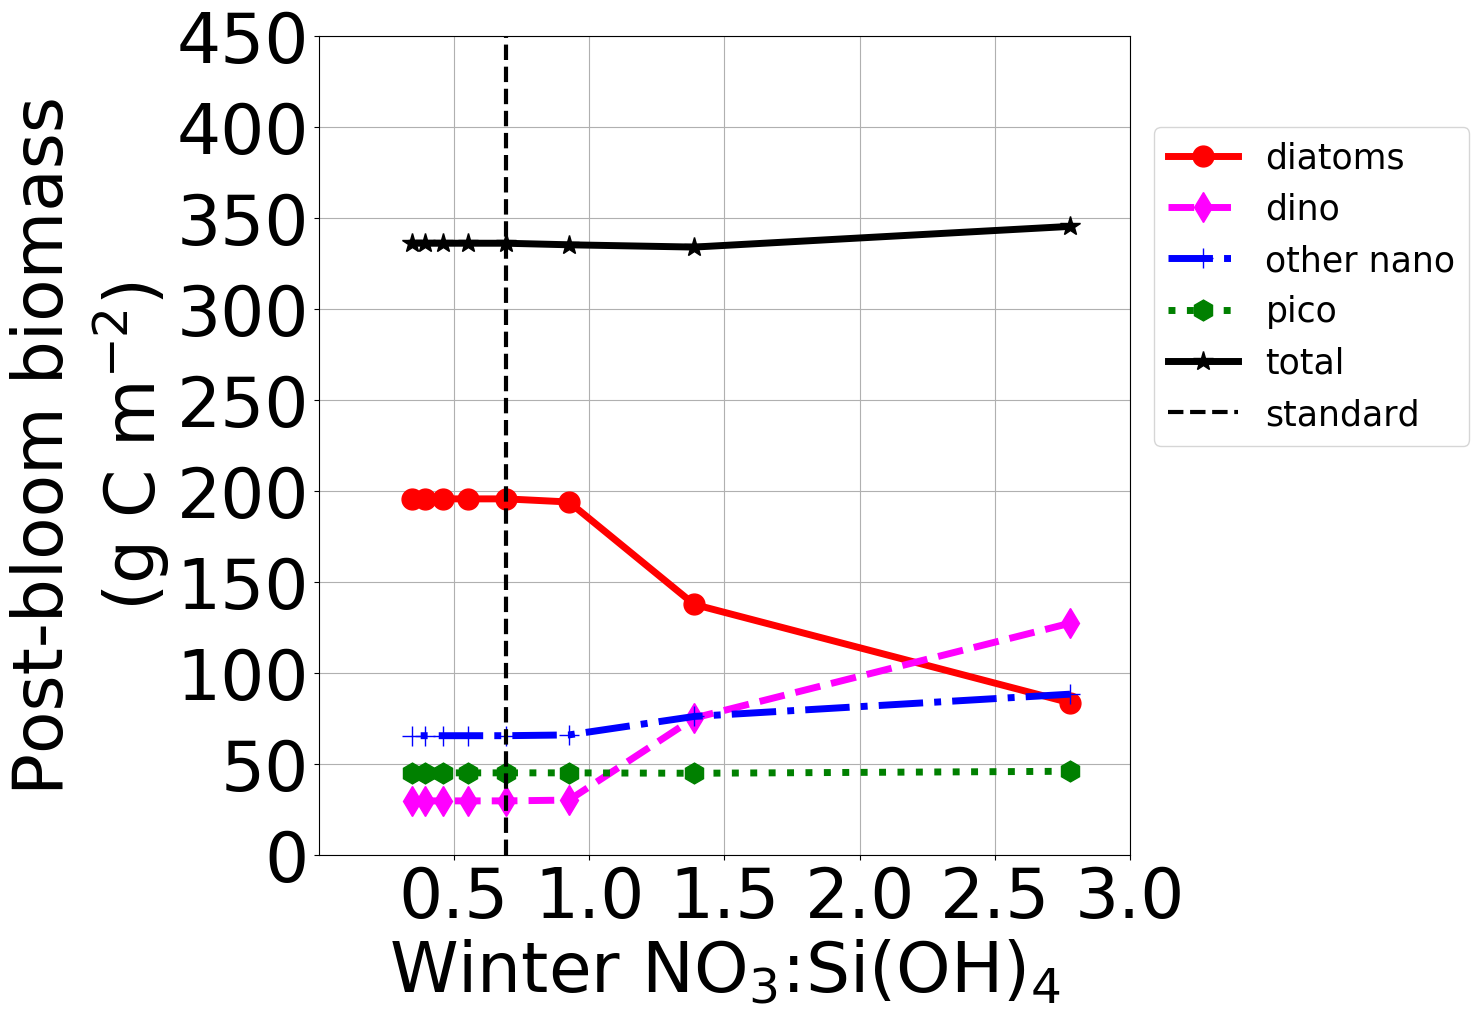

In [15]:
def make_plots(ax):
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['diatoms_biomass_afterpeak_gCm2'].values,
             color='red',marker='o',ls='-',label='diatoms')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['dino_biomass_afterpeak_gCm2'].values,
             color='magenta',marker='d',ls='--',label='dino')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['other_biomass_afterpeak_gCm2'].values,
             color='blue',marker='+',ls='-.',label='other nano')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['pico_biomass_afterpeak_gCm2'].values,
             color='green',marker='h',ls=':',label='pico')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['total_biomass_afterpeak_gCm2'].values,
             color='black',marker='*',ls='-',label='total')
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Post-bloom biomass\n($\mathrm{ g\ C\ m^{-2} }$)')
    ax.set_xlim(0,3)
    ax.set_ylim(0,450)
    ax.set_xticks(np.arange(0.5,3.1,0.5))
#     ax.set_xticks([1,2,3])
#     ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend(loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('biomass_vs_mr.exp2.2.xlim0_3.png')

Figure. Biomass of the different groups between the bloom peak and the
end of year for different values of "winter"
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$.
Winter
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
is the 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
on May 15.
Note that the calculation of the molar ratio was different from Ardyna
et al. (2020) in $Elementa$.
Dotted vertical line was the observed winter 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$ molar ratio at the Green Edge
sea ice camp 2016.

## Plots: relative contribution of biomass

In %.

In [16]:
silicic=groups_after_peak_df['silicicacid0_100_onMay15_mmolSim2']
# silicic

In [17]:
percentages={
    'diatoms':groups_after_peak_df['diatoms_perc_afterpeak'],
    'dino'   :groups_after_peak_df['dino_perc_afterpeak'],
    'other'  :groups_after_peak_df['other_perc_afterpeak'],
    'pico'   :groups_after_peak_df['pico_perc_afterpeak'],
}
# percentages

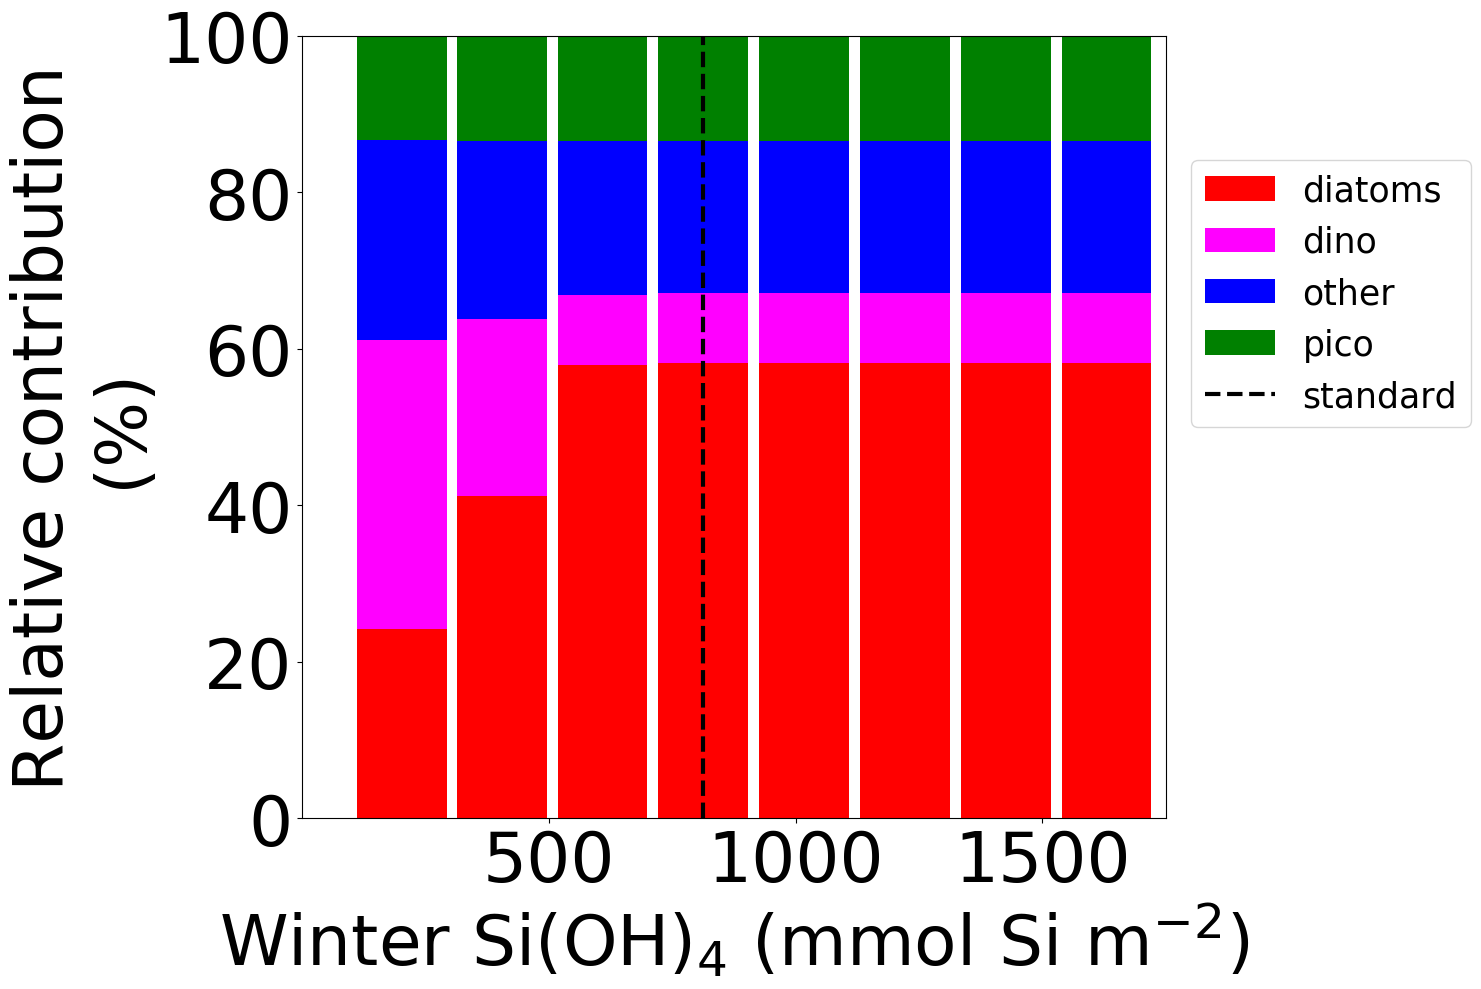

In [18]:
def make_plots(ax):
    width=125*1750/1200
    bottom=np.zeros(len(silicic))
    cc=cycler.cycler(color=['red','magenta','blue','green'])
    ax.set_prop_cycle(cc)
    for group,percentages_one_group in percentages.items():
        ax.bar(silicic.values,percentages_one_group,
               width,label=group,bottom=bottom)
        bottom+=percentages_one_group.values
    ax.set_xlabel('Winter $\mathrm{ Si(OH)_4 }$ ($\mathrm{ mmol\ Si\ m^{-2} }$)')
    ax.set_ylabel('Relative contribution\n(%)')
    ax.set_xlim(0,1750)
    ax.set_ylim(0,100)
    ax.set_xticks(np.arange(500,1501,500))
    ax.axvline(obssilicic,
               color='k',ls='--',lw=3,label='standard')
    # 'standard' appears at the top of the legend.
    # I don't understand why.
    # the code below solves this problem and places 'legend' at the bottom
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    legend_handles_new=legend_handles[1:]+[legend_handles[0]]
    legend_labels_new=legend_labels[1:]+[legend_labels[0]]
    ax.legend(legend_handles_new,legend_labels_new,loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_silicic.exp2.2.png')

Figure. Relative contribution to phytoplankton biomass by
group between the bloom peak and the end of year for different values of
silicic acid vertically integrated (0-100m) on May 15
($\mathrm{ mmol\ N\ m^{-2} }$).
Dotted vertical line was the observed winter silicic acid at the
Green Edge sea ice camp 2016.

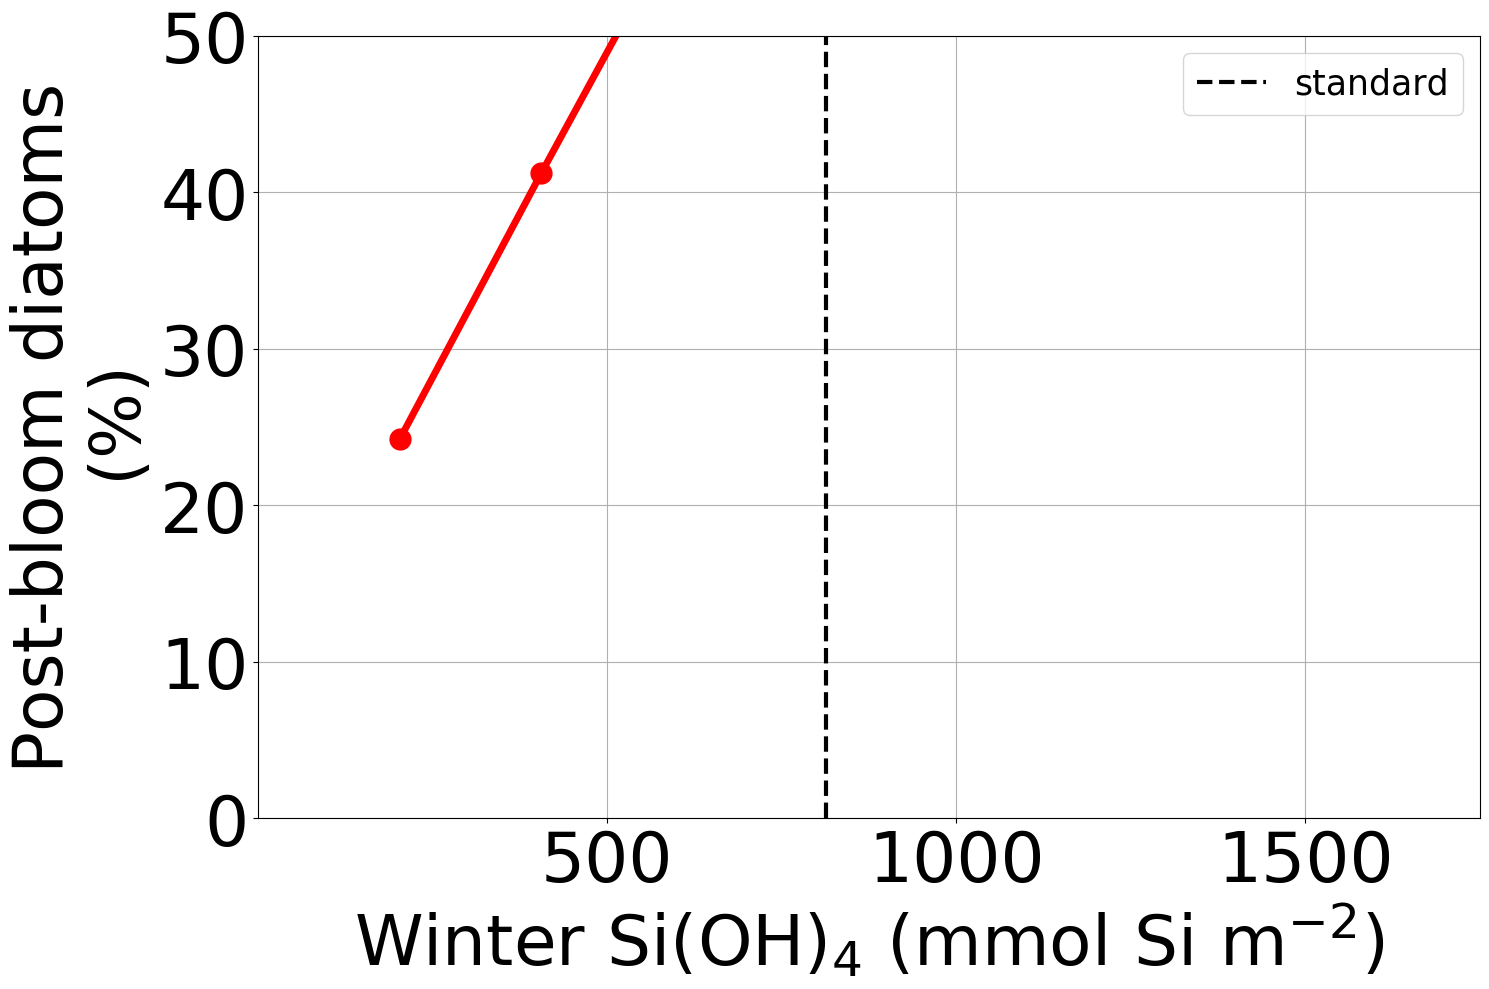

In [19]:
def make_plots(ax):
    plt.plot(silicic.values,percentages['diatoms'].values,
             linestyle='-',color='red',marker='o')
    ax.set_xlabel('Winter $\mathrm{ Si(OH)_4 }$ ($\mathrm{ mmol\ Si\ m^{-2} }$)')
    ax.set_ylabel('Post-bloom diatoms\n($\%$)')
    ax.set_xlim(0,1750)
    ax.set_ylim(0,50)
    ax.set_xticks(np.arange(500,1501,500))
    ax.axvline(obssilicic,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend()
    plt.tight_layout()
    
with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_silicic_diatoms.exp2.2.png')

Figure. Relative contribution of diatoms to phytoplankton biomass 
between the bloom peak and the end of year for different values of silicic acid vertically integrated (0-100m) on May 15
($\mathrm{ mmol\ Si\ m^{-2} }$).
Dotted vertical line was the observed winter silicic acid at the
Green Edge sea ice camp 2016.

## Plots: relative contribution of molar ratio

In %.

In [20]:
mr=groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15']
# mr

In [21]:
percentages={
    'diatoms':groups_after_peak_df['diatoms_perc_afterpeak'],
    'dino'   :groups_after_peak_df['dino_perc_afterpeak'],
    'other'  :groups_after_peak_df['other_perc_afterpeak'],
    'pico'   :groups_after_peak_df['pico_perc_afterpeak'],
}
# percentages

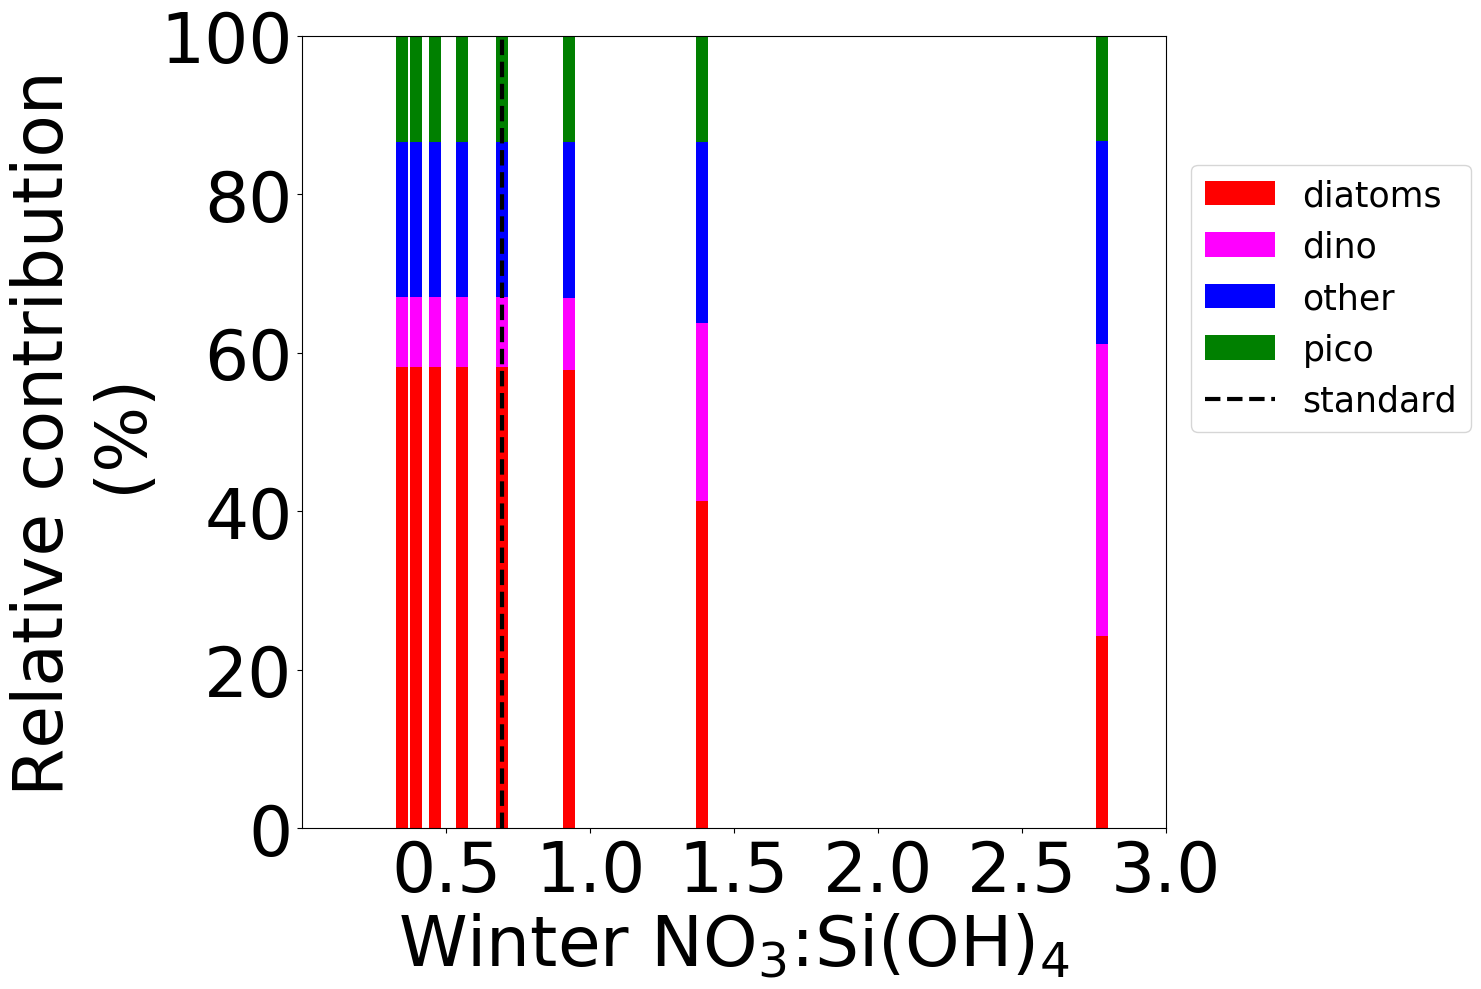

In [22]:
def make_plots(ax):
#     width=1.48*125/1200
    width=0.4*125/1200
    bottom=np.zeros(len(mr))
    cc=cycler.cycler(color=['red','magenta','blue','green'])
    ax.set_prop_cycle(cc)
    for group,percentages_one_group in percentages.items():
        ax.bar(mr.values,percentages_one_group,
               width,label=group,bottom=bottom)
        bottom+=percentages_one_group.values
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Relative contribution\n(%)')
    ax.set_xlim(0,3)
    ax.set_ylim(0,100)
    ax.set_xticks(np.arange(0.5,3.1,0.5))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    # 'standard' appears at the top of the legend.
    # I don't understand why.
    # the code below solves this problem and places 'legend' at the bottom
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    legend_handles_new=legend_handles[1:]+[legend_handles[0]]
    legend_labels_new=legend_labels[1:]+[legend_labels[0]]
    ax.legend(legend_handles_new,legend_labels_new,loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_mr.exp2.2.xlim0_3.png')

Figure. Relative contribution to phytoplankton biomass by
group between the bloom peak and the end of year for different values 
of "winter"
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$.
Winter
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
is the 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
on May 15.
Note that the calculation of the molar ratio was different from Ardyna
et al. (2020) in $Elementa$.
Dotted vertical line was the observed winter 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$ molar ratio at the Green Edge
sea ice camp 2016.